<h1> Analyzing the listing and pricing trends in Kentucky metropolitan areas

<h2>Loading and viewing the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
count = pd.read_csv('NEWLISCOUKY.csv')
price = pd.read_csv('monthly.csv')

In [3]:
count.head()

,Observation_Date,Newly Listed Houses
0,2/1/2021,3728
1,3/1/2021,4780
2,4/1/2021,5262
3,5/1/2021,5444
4,6/1/2021,5550


In [4]:
count[['Observation_Date', 'Newly Listed Houses']]

,Observation_Date,Newly Listed Houses
0,2/1/2021,3728
1,3/1/2021,4780
2,4/1/2021,5262
3,5/1/2021,5444
4,6/1/2021,5550
5,7/1/2021,5928
6,8/1/2021,5758
7,9/1/2021,5152
8,10/1/2021,4968
9,11/1/2021,4562


In [5]:
price.head()

,Observation_Date,Bowling Green Average Price,Frankfort Average Price,Lexington Average Price,Louisville Average Price,Richmond-Berea Average Price,Bowling Green Median Price,Frankfort Median Price,Lexington Median Price,Louisville Median Price,Richmond-Berea Median Price
0,2/1/2022,372264,272826,494651,370359,323945,297950,231975,348095,282400,259900
1,3/1/2022,396530,293104,506204,380290,336781,297450,268575,352500,292450,267400
2,4/1/2022,405316,263607,501017,383436,348121,309900,279900,375390,295000,269900
3,5/1/2022,402446,290351,504815,382568,342252,305200,278725,388175,299425,290700
4,6/1/2022,401342,294490,493676,385327,339414,324900,275450,394700,299900,288500


In [6]:
price[['Observation_Date']]

,Observation_Date
0,2/1/2022
1,3/1/2022
2,4/1/2022
3,5/1/2022
4,6/1/2022
5,7/1/2022
6,8/1/2022
7,9/1/2022
8,10/1/2022
9,11/1/2022


<h2> Cleaning the data

As much as I'd love to comb through almost ten years of data, most of that is irrelevant to the question at hand. Three years, broken down by month should be plenty to establish patterns.

In [7]:
count = count.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
count.reset_index(drop=True, inplace=True)
count

,Observation_Date,Newly Listed Houses
0,2/1/2022,4066
1,3/1/2022,4886
2,4/1/2022,4772
3,5/1/2022,5624
4,6/1/2022,5934
5,7/1/2022,5484
6,8/1/2022,4892
7,9/1/2022,4626
8,10/1/2022,4276
9,11/1/2022,3622


In [15]:
df = pd.merge(price, count)
df

,Observation_Date,Bowling Green Average Price,Frankfort Average Price,Lexington Average Price,Louisville Average Price,Richmond-Berea Average Price,Bowling Green Median Price,Frankfort Median Price,Lexington Median Price,Louisville Median Price,Richmond-Berea Median Price,Newly Listed Houses
0,2/1/2022,372264,272826,494651,370359,323945,297950,231975,348095,282400,259900,4066
1,3/1/2022,396530,293104,506204,380290,336781,297450,268575,352500,292450,267400,4886
2,4/1/2022,405316,263607,501017,383436,348121,309900,279900,375390,295000,269900,4772
3,5/1/2022,402446,290351,504815,382568,342252,305200,278725,388175,299425,290700,5624
4,6/1/2022,401342,294490,493676,385327,339414,324900,275450,394700,299900,288500,5934
5,7/1/2022,395778,318860,494916,374304,330721,329900,277000,399000,299900,275000,5484
6,8/1/2022,397923,327885,490924,370691,340895,334131,280725,383600,299900,289950,4892
7,9/1/2022,399218,338760,496722,369434,348842,338813,297000,386950,299925,294725,4626
8,10/1/2022,408910,343225,507050,363106,353670,338900,294700,386900,299900,299900,4276
9,11/1/2022,658892,340287,474894,353559,337107,331098,287625,374757,290000,294425,3622


<h2>Let's visualize the data

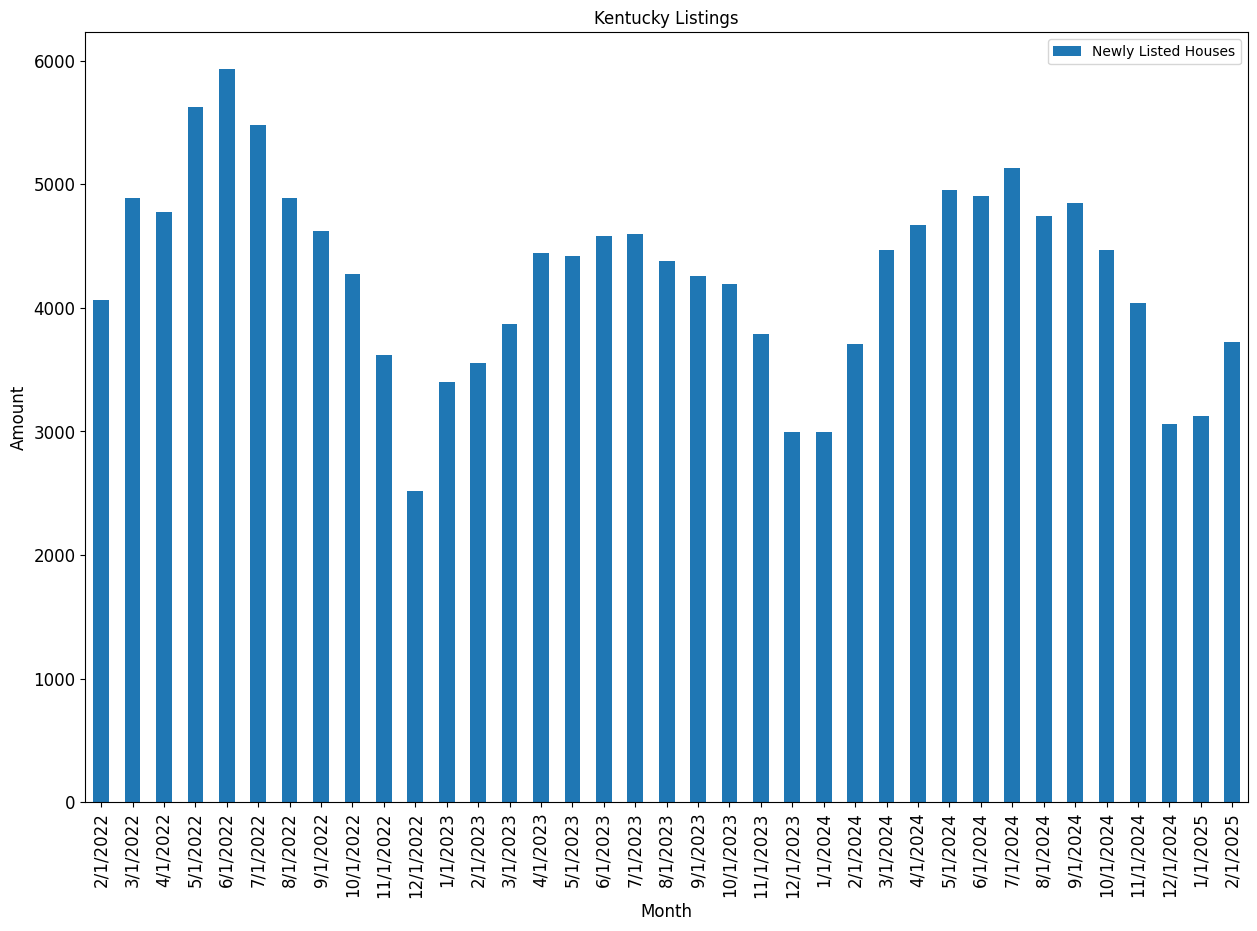

In [9]:
ax = df.plot(x="Observation_Date",y="Newly Listed Houses",kind='bar', title ="Kentucky Listings", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Amount", fontsize=12)
plt.show()